In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

from scipy import stats
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
data_processed = pd.read_excel('/Users/ashutoshanand/Documents/UGP- Sanjiv/Dataset and Code files/Tomato Processed data.xlsx',index_col='Date')

In [6]:
data_processed

,W.sale Avg.Price,Inflation_rate,Growth_rate,Log_MS,Month,Year,Quarter,W.sale Avg.Price_1M_Lag,W.sale Avg.Price_3M_Lag,Inflation_rate_1M_Lag,...,Growth_rate_1M_Lag,Growth_rate_3M_Lag,Log_MS_1M_Lag,Log_MS_3M_Lag,Price_3M_Rolling_Mean,Price_6M_Rolling_Mean,Price_3M_Rolling_Std,Price_6M_Rolling_Std,Inflation_Growth_Interaction,seasonal_component
Date,,,,,,,,,,,,,,,,,,,,,
2000-06-01,1182.0,5.238095,38.171534,16.281510,6,2000,2,736.0,392.0,5.011930,...,38.194843,30.215964,16.267717,16.235144,719.333333,599.500000,471.221109,332.994745,199.946120,1.244693
2000-07-01,953.0,4.952828,13.306099,16.281959,7,2000,3,1182.0,240.0,5.238095,...,38.171534,27.288814,16.281510,16.261410,957.000000,657.833333,223.026904,363.031909,65.902813,1.386104
2000-08-01,944.0,3.990609,22.953398,16.288343,8,2000,3,953.0,736.0,4.952828,...,13.306099,38.194843,16.281959,16.267717,1026.333333,741.166667,134.886372,361.513716,91.598023,1.185297
2000-09-01,920.0,3.496508,41.795593,16.303125,9,2000,3,944.0,1182.0,3.990609,...,22.953398,38.171534,16.288343,16.281510,939.000000,829.166667,17.058722,321.577622,146.138613,1.137432
2000-10-01,3500.0,2.746003,47.315842,16.319555,10,2000,4,920.0,953.0,3.496508,...,41.795593,13.306099,16.303125,16.281959,1788.000000,1372.500000,1482.684053,1051.858118,129.929446,1.408927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,2511.0,6.998158,-0.679758,19.165064,8,2022,3,2389.0,4426.0,6.707692,...,2.205323,19.721981,19.164157,19.147374,3242.000000,2826.500000,1373.139833,1476.515188,-4.757056,1.185297
2022-09-01,3837.0,7.414216,3.320463,19.166083,9,2022,3,2511.0,4826.0,6.998158,...,-0.679758,12.622150,19.165064,19.146480,2912.333333,3238.833333,803.104808,1323.604989,24.618631,1.137432
2022-10-01,4450.0,6.767372,-4.074074,19.176894,10,2022,4,3837.0,2389.0,7.414216,...,3.320463,2.205323,19.166083,19.164157,3599.333333,3739.833333,991.107630,1048.727117,-27.570773,1.408927


In [8]:
# Updated exogenous variables after feature engineering
exog_enhanced = data_processed.drop(['W.sale Avg.Price'], axis=1)
target_processed = data_processed['W.sale Avg.Price']

In [10]:
# Updated exogenous variables after feature engineering
exog_enhanced = exog_enhanced[[
    'Inflation_rate',
    'Growth_rate',
    'W.sale Avg.Price_1M_Lag',
    'W.sale Avg.Price_3M_Lag',
    'Log_MS_1M_Lag',  # marginally significant
    'Price_3M_Rolling_Mean',
    'Price_6M_Rolling_Mean',
    'Price_3M_Rolling_Std',
    'Price_6M_Rolling_Std',
    'seasonal_component'
]]


In [12]:
# Split data into training and testing sets (80-20 split)
train_size = int(len(data_processed) * 0.80)
train_target = target_processed[:train_size]
test_target = target_processed[train_size:]
train_exog = exog_enhanced[:train_size]
test_exog = exog_enhanced[train_size:]

In [14]:
# Revised model with reduced AR terms and only significant predictors
revised_model = SARIMAX(
    train_target,
    exog=train_exog,
    order=(2, 1, 0),  # Remove AR terms, keep integration
    seasonal_order=(1, 0, 2, 12),  # Remove seasonal AR terms
)

# Fit the model
optimized_fit = revised_model.fit(disp=False)
print(optimized_fit.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                        W.sale Avg.Price   No. Observations:                  216
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1592.619
Date:                                 Sun, 20 Apr 2025   AIC                           3217.239
Time:                                         07:02:08   BIC                           3271.169
Sample:                                     06-01-2000   HQIC                          3239.029
                                          - 05-01-2018                                         
Covariance Type:                                   opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Inflation_rate            168.5492     33.036   

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
# Forecast on test set
forecast = optimized_fit.get_forecast(steps=len(test_target), exog=test_exog)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


Mean Squared Error (MSE): 647645.46
Root Mean Squared Error (RMSE): 804.76
Mean Absolute Error (MAE): 595.50
Mean Absolute Percentage Error (MAPE): 28.93%
R-squared (R²): 0.4686


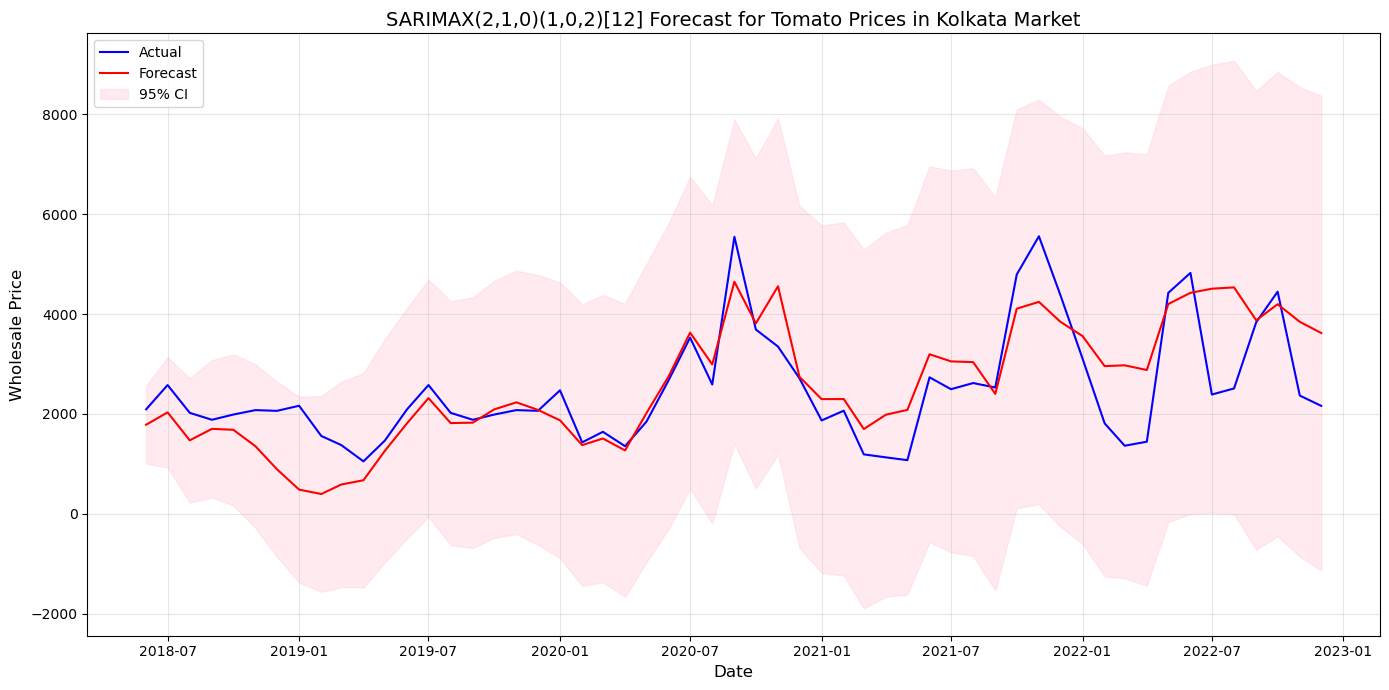

In [18]:
# Calculate performance metrics
mse = mean_squared_error(test_target, predicted_mean)
rmse = np.sqrt(mse)
r2 = r2_score(test_target, predicted_mean)
mae = mean_absolute_error(test_target, predicted_mean)
mape = np.mean(np.abs((test_target - predicted_mean) / test_target)) * 100


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

# Plot the results with 95% confidence interval
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual', color='blue')
plt.plot(test_target.index, predicted_mean, label='Forecast', color='red')
plt.fill_between(test_target.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% CI')

# Format the plot
plt.title('SARIMAX(2,1,0)(1,0,2)[12] Forecast for Tomato Prices in Kolkata Market', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wholesale Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## SARIMAX-GARCH

In [25]:
from statsmodels.stats.diagnostic import het_arch

# Extract residuals from your fitted SARIMAX model
residuals = optimized_fit.resid
squared_residuals = residuals**2

# Perform ARCH LM test
arch_test = het_arch(squared_residuals, nlags=10)
print(f"ARCH LM test p-value: {arch_test[1]}")
# If p-value < 0.05, ARCH effects are present


ARCH LM test p-value: 1.0


In [27]:
from arch import arch_model

In [28]:
# Implement a basic GARCH(1,1) despite  test results
residuals_clean = optimized_fit.resid.dropna()
garch_model = arch_model(residuals_clean, vol='GARCH', p=1, q=1)
garch_results = garch_model.fit(disp='off')

# Compare information criteria
print(f"SARIMAX AIC: {optimized_fit.aic}")
print(f"SARIMAX-GARCH combined AIC: {optimized_fit.aic + garch_results.aic}")

# Simple two-step forecasting approach
sarimax_forecast = optimized_fit.get_forecast(steps=len(test_target), exog=test_exog)
sarimax_mean = sarimax_forecast.predicted_mean

garch_forecast = garch_results.forecast(horizon=len(test_target))
garch_variance = garch_forecast.variance.values[-1, :]

# Create prediction intervals with GARCH volatility
import numpy as np
lower_bound = sarimax_mean - 1.96 * np.sqrt(garch_variance)
upper_bound = sarimax_mean + 1.96 * np.sqrt(garch_variance)

SARIMAX AIC: 3217.238769133194
SARIMAX-GARCH combined AIC: 6492.065326294247


/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.669e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


 ### Our time series residuals do not exhibit conditional heteroskedasticity, so fitting an ARCH or GARCH model is likely unnecessary.

# SARIMAX-LSTM

In [33]:
# Extract residuals from your fitted SARIMAX model
sarimax_residuals = optimized_fit.resid
sarimax_fitted = optimized_fit.fittedvalues


In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Create sequences for LSTM from SARIMAX residuals
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence) - n_steps):
        end_ix = i + n_steps
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define number of time steps (lookback period)
n_steps = 12  # Example: 12 months for monthly data

# Scale the residuals
scaler = MinMaxScaler(feature_range=(-1, 1))
residuals_scaled = scaler.fit_transform(sarimax_residuals.values.reshape(-1, 1))

# Prepare sequences
X, y = split_sequence(residuals_scaled, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM [samples, timesteps, features]

# Split into train and test sets
train_samples = int(len(X) * 0.8)
X_train, X_test = X[:train_samples], X[train_samples:]
y_train, y_test = y[:train_samples], y[train_samples:]


In [36]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(1))



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

# Define the model creation function
def create_lstm_model(units1=128, units2=64, dropout=0.2):
    model = Sequential()
    model.add(LSTM(units=units1, activation='relu', return_sequences=True, 
                   input_shape=(n_steps, 1)))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units2, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Create KerasRegressor
lstm_model = KerasRegressor(
    model=create_lstm_model, 
    verbose=0
)

# Define parameters with correct prefixes
param_dist = {
    'model__units1': [64, 128, 256],
    'model__units2': [32, 64, 128],
    'model__dropout': [0.1, 0.2, 0.3],
    'batch_size': [6, 12,24],
    'epochs': [50, 100, 150]
}

# Random search
random_search = RandomizedSearchCV(
    estimator=lstm_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim`

In [41]:
print("SARIMAX residuals:", type(sarimax_residuals), 
      getattr(sarimax_residuals, 'shape', len(sarimax_residuals) if hasattr(sarimax_residuals, '__len__') else 'unknown'))
print("LSTM X_train:", X_train.shape)
print("Scaler feature range:", scaler.feature_range)


SARIMAX residuals: <class 'pandas.core.series.Series'> (216,)
LSTM X_train: (163, 12, 1)
Scaler feature range: (-1, 1)


In [43]:
print("Best score from RandomizedSearchCV:", random_search.best_score_)


Best score from RandomizedSearchCV: -1.379625069927968


In [45]:
print("Test exog variables:", test_exog.shape if hasattr(test_exog, 'shape') else len(test_exog))
print("Test target length:", len(test_target))


Test exog variables: (55, 10)
Test target length: 55


In [47]:
# 1. First, make sure we're using the best model from hyperparameter tuning
best_params = random_search.best_params_
print("Best parameters:", best_params)



Best parameters: {'model__units2': 64, 'model__units1': 64, 'model__dropout': 0.2, 'epochs': 150, 'batch_size': 24}


In [49]:
# Build the LSTM model using best parameters
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(12, 1)))  # First LSTM layer
model.add(Dropout(0.1))  # Dropout after first LSTM

model.add(LSTM(units=64, activation='relu'))  # Second LSTM layer
model.add(Dropout(0.2))  # Dropout after second LSTM

model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=24,
    validation_split=0.2,
    verbose=1
)


Epoch 1/150


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.7467 - val_loss: 0.5710
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5033 - val_loss: 0.2309
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1524 - val_loss: 0.0477
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0887 - val_loss: 0.0021
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - val_loss: 0.0289
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0378 - val_loss: 0.0082
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0181 - val_loss: 0.0041
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0209 - val_loss: 8.6861e-04
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141 - val_loss: 0.0031
Epoch 10/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0124 - val_loss: 0.0024
Epoch 11/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0143 - val_loss: 5.0173e-04
Epoch 12/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0094 - val_loss: 

In [51]:
def forecast_hybrid(steps, exog_future=None):
    """Generate forecasts using hybrid SARIMAX-LSTM model with log transformation handling
    
    Args:
        steps: Number of steps to forecast (55 for your test set)
        exog_future: Future exogenous variables (shape 55,4 for your test set)
        
    Returns:
        Hybrid forecast as pandas Series in original scale
    """
    # 1. Generate SARIMAX forecasts
    sarimax_forecast = optimized_fit.get_forecast(steps=steps, exog=exog_future)
    sarimax_pred = sarimax_forecast.predicted_mean
    
    # 2. Prepare latest residuals for LSTM
    n_steps = 12  # Matches your LSTM input shape
    last_residuals = sarimax_residuals[-n_steps:].values.reshape(-1, 1)
    last_residuals_scaled = scaler.transform(last_residuals)
    
    # 3. Initialize LSTM recursive prediction
    lstm_input = last_residuals_scaled.reshape(1, n_steps, 1)
    lstm_residuals_future = []
    
    # 4. Generate future residuals predictions
    for i in range(steps):
        # Predict next residual
        next_residual = model.predict(lstm_input, verbose=0)
        lstm_residuals_future.append(next_residual[0, 0])
        
        # Update input sequence (rolling window approach)
        lstm_input = np.roll(lstm_input, -1, axis=1)
        lstm_input[0, -1, 0] = next_residual[0, 0]
    
    # 5. Inverse transform predicted residuals
    lstm_residuals_future = np.array(lstm_residuals_future).reshape(-1, 1)
    lstm_residuals_future = scaler.inverse_transform(lstm_residuals_future).flatten()
    
    if 'results' in globals():
        results['lstm_residuals_future'] = lstm_residuals_future
    
    # 6. Combine SARIMAX and LSTM components
    hybrid_forecast = sarimax_pred.values + lstm_residuals_future
    
    # Return as pandas Series with proper index
    return pd.Series(hybrid_forecast, index=sarimax_pred.index)



===== Model Performance Comparison =====
SARIMAX Model Evaluation:
RMSE: 804.7642
MAE: 595.4982
R2 Score: 0.4686

Hybrid SARIMAX-LSTM Model Evaluation:
RMSE: 805.6181
MAE: 610.0509
R2 Score: 0.4674

Performance Improvement:
RMSE: -0.11%
MAE: -2.44%
R2: -0.24%


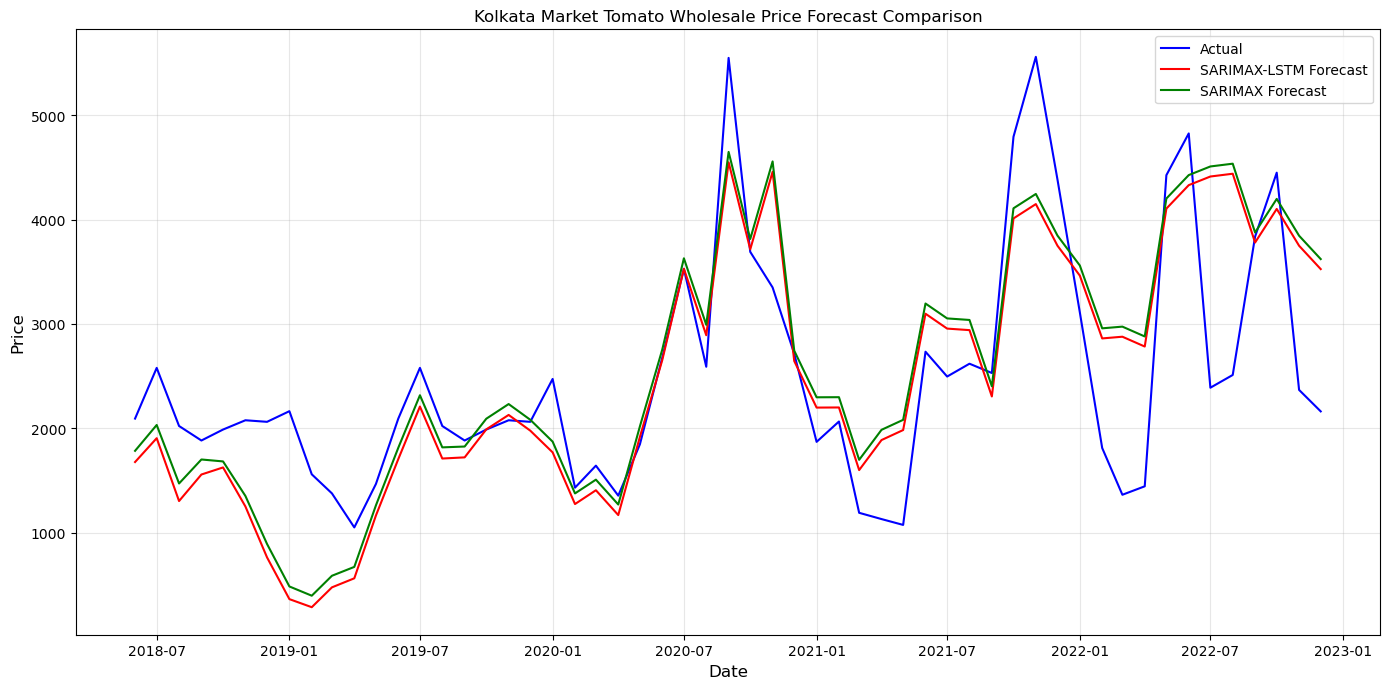

In [57]:
results = {}

# Generate hybrid forecasts (assuming your forecast_hybrid function has log transform correction)
hybrid_forecast = forecast_hybrid(len(test_target), test_exog)

# Get SARIMAX forecasts
sarimax_forecast = optimized_fit.get_forecast(steps=len(test_target), exog=test_exog)
sarimax_pred = sarimax_forecast.predicted_mean

# Calculate performance metrics with transformed predictions
rmse_sarimax = np.sqrt(mean_squared_error(test_target, sarimax_pred))
mae_sarimax = mean_absolute_error(test_target, sarimax_pred)
r2_sarimax = r2_score(test_target, sarimax_pred)

rmse_hybrid = np.sqrt(mean_squared_error(test_target, hybrid_forecast))
mae_hybrid = mean_absolute_error(test_target, hybrid_forecast)
r2_hybrid = r2_score(test_target, hybrid_forecast)

# Print comparison results
print("\n===== Model Performance Comparison =====")
print("SARIMAX Model Evaluation:")
print(f"RMSE: {rmse_sarimax:.4f}")
print(f"MAE: {mae_sarimax:.4f}")
print(f"R2 Score: {r2_sarimax:.4f}")

print("\nHybrid SARIMAX-LSTM Model Evaluation:")
print(f"RMSE: {rmse_hybrid:.4f}")
print(f"MAE: {mae_hybrid:.4f}")
print(f"R2 Score: {r2_hybrid:.4f}")

print(f"\nPerformance Improvement:")
print(f"RMSE: {((rmse_sarimax - rmse_hybrid) / rmse_sarimax * 100):.2f}%")
print(f"MAE: {((mae_sarimax - mae_hybrid) / mae_sarimax * 100):.2f}%")
print(f"R2: {((r2_hybrid - r2_sarimax) / abs(r2_sarimax) * 100):.2f}%")

# Visualize results with transformed predictions
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual', color='blue')
plt.plot(test_target.index, hybrid_forecast, label='SARIMAX-LSTM Forecast', color='red')
plt.plot(test_target.index, sarimax_pred, label='SARIMAX Forecast', color='green')
plt.title('Kolkata Market Tomato Wholesale Price Forecast Comparison')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
